In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [95]:
df = pd.read_csv("onlinefraudnew.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [96]:
df.isnull().sum()

step              998560
type              998560
amount            998560
nameOrig          998560
oldbalanceOrg     998560
newbalanceOrig    998560
nameDest          998560
oldbalanceDest    998560
newbalanceDest    998560
isFraud           998560
isFlaggedFraud    998560
dtype: int64

In [97]:
df = df.dropna(how='all')

In [98]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [99]:
df['type'].value_counts()

type
PAYMENT     21914
CASH_OUT    13756
CASH_IN      8992
TRANSFER     4700
DEBIT         640
Name: count, dtype: int64

In [103]:
df['nameOrig'].value_counts()

nameOrig
C1231006815    1
C733749588     1
C1567015632    1
C986934168     1
C668560116     1
              ..
C644302332     1
C1997502668    1
C2081381475    1
C84107608      1
C1670823727    1
Name: count, Length: 50002, dtype: int64

In [104]:
df['nameDest'].value_counts()

nameDest
C985934102     74
C1286084959    67
C1590550415    64
C2083562754    62
C248609774     61
               ..
M55629191       1
M1347568188     1
M267580296      1
M382826571      1
M685658353      1
Name: count, Length: 28501, dtype: int64

In [105]:
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0.0,0.0
96,1.0,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19200000.00,0.0,0.0
97,1.0,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0.0,0.0
98,1.0,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0.0,0.0


In [106]:
## Check Misssing Values
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [107]:
df.drop('step', inplace=True, axis=1)


In [108]:
df.head(10)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


## Feature Engineering

### Feature Extraction

In [109]:
## get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 7


In [110]:
##categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 3


In [111]:
## Discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 2


In [112]:
## coontinuous features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 5


In [113]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [114]:
# Data Cleaning
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

In [115]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [117]:
# Separate features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [118]:
# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [119]:
# Define feature types
categorical_features = ['type']
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [123]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

In [124]:
# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [125]:
# Save the preprocessor
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

In [80]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

In [81]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_preprocessed, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_preprocessed)
    y_test_pred = model.predict(X_test_preprocessed)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.9981
- F1 score: 0.9972
- Precision: 1.0000
- Recall: 0.0500
- Roc Auc Score: 0.5250
----------------------------------
Model performance for Test set
- Accuracy: 0.9981
- F1 score: 0.9972
- Precision: 1.0000
- Recall: 0.0500
- Roc Auc Score: 0.5250


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9984
- F1 score: 0.9985
- Precision: 0.5714
- Recall: 0.8000
- Roc Auc Score: 0.8994


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9992
- F1 score: 0.9991
- Precision: 1.0000
- Recall: 0.6000
- Roc Auc Score: 0.8000


Gradient Boosting
Model performance for Training 

In [83]:
# Define parameter grids for all models

Logistic_Regression_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
Decision_Tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
Random_Forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
Gradient_Boosting_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
AdaBoost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
XGBoost_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
Naive_Bayes_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
SVM_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
KNN_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance']
}


In [84]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ('Logistic Regression', LogisticRegression(solver='liblinear'), Logistic_Regression_params),('Decision Tree', DecisionTreeClassifier(), Decision_Tree_params),('Random Forest', RandomForestClassifier(), Random_Forest_params),('Gradient Boosting', GradientBoostingClassifier(), Gradient_Boosting_params),('AdaBoost', AdaBoostClassifier(), AdaBoost_params),('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), XGBoost_params),('Naive Bayes', GaussianNB(), Naive_Bayes_params),('SVM', SVC(probability=True), SVM_params),('KNN', KNeighborsClassifier(), KNN_params)
                   
                   ]

In [85]:
randomcv_models

[('Logistic Regression',
  LogisticRegression(solver='liblinear'),
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}),
 ('Decision Tree',
  DecisionTreeClassifier(),
  {'max_depth': [None, 10, 20, 30],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]}),
 ('Random Forest',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 300],
   'max_depth': [None, 10, 20, 30],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'max_features': ['auto', 'sqrt', 'log2']}),
 ('Gradient Boosting',
  GradientBoostingClassifier(),
  {'n_estimators': [100, 200, 300],
   'learning_rate': [0.01, 0.1, 0.2],
   'max_depth': [3, 5, 7],
   'subsample': [0.8, 1.0]}),
 ('AdaBoost',
  AdaBoostClassifier(),
  {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, d

In [86]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_preprocessed, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
---------------- Best Params for Logistic Regression -------------------
{'penalty': 'l2', 'C': 100}
---------------- Best Params for Decision Tree -------------------
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
---------------- Best Params for Random Forest -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
---------------- Best Params for Gra

In [87]:
models={
    
    'Logistic Regression':LogisticRegression(solver='liblinear', penalty='l2', C=100),
    'Decision Tree':DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=2, max_depth=None),
    'Random Forest':RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=20),
    'Gradient Boosting':GradientBoostingClassifier(subsample=0.8, n_estimators=300, max_depth=5, learning_rate=0.01),
    'AdaBoost':AdaBoostClassifier(n_estimators=200, learning_rate=1.0),
    'XGBoost':XGBClassifier(use_label_encoder=False, eval_metric='logloss', subsample=1.0, n_estimators=100, max_depth=7, learning_rate=0.2, colsample_bytree=0.8),
    'Naive Bayes':GaussianNB(var_smoothing=1e-07),
    'SVM':SVC(probability=True, kernel='rbf', gamma='scale', C=10),
    'KNN':KNeighborsClassifier(weights='distance', n_neighbors=7)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_preprocessed, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_preprocessed)
    y_test_pred = model.predict(X_test_preprocessed)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.9982
- F1 score: 0.9976
- Precision: 0.9091
- Recall: 0.1250
- Roc Auc Score: 0.5625
----------------------------------
Model performance for Test set
- Accuracy: 0.9981
- F1 score: 0.9972
- Precision: 1.0000
- Recall: 0.0500
- Roc Auc Score: 0.5250


Decision Tree
Model performance for Training set
- Accuracy: 0.9990
- F1 score: 0.9989
- Precision: 0.8868
- Recall: 0.5875
- Roc Auc Score: 0.7937
----------------------------------
Model performance for Test set
- Accuracy: 0.9990
- F1 score: 0.9989
- Precision: 0.8571
- Recall: 0.6000
- Roc Auc Score: 0.7999


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9992
- F1 score: 0.9991
- Precision: 1.0000
- Recall: 0.6000
- Roc Auc Score: 0.8000


Gradient Boosting
Model performance for Training 

<Figure size 640x480 with 0 Axes>

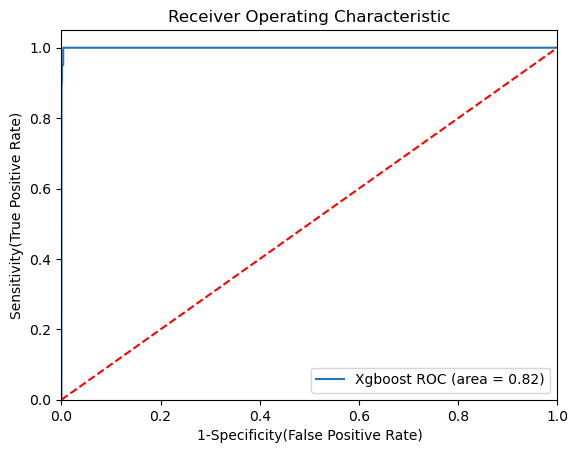

In [90]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Xgboost',
    'model':XGBClassifier(use_label_encoder=False, eval_metric='logloss', subsample=1.0, n_estimators=100, max_depth=7, learning_rate=0.2, colsample_bytree=0.8),
    'auc':  0.8250
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train_preprocessed, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_preprocessed)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

In [91]:
best_model=XGBClassifier(use_label_encoder=False, eval_metric='logloss', subsample=1.0, n_estimators=100, max_depth=7, learning_rate=0.2, colsample_bytree=0.8)

In [92]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [93]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [128]:
import sklearn
print(f"scikit-learn version in training environment: {sklearn.__version__}")

scikit-learn version in training environment: 1.6.1


In [129]:
best_model.fit(X_train_preprocessed, y_train)  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [130]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)